<a href="https://colab.research.google.com/github/colinjhorgan/MLTSAFinalProject/blob/main/Models%20and%20Evaluation/CNN_Model_Cart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Mounted at /content/gdrive


In [ ]:
#Read in data and data labels
im_arr = np.load('/content/gdrive/MyDrive/3. MSDS Courses/Machine Learning Time Series/MLTSA22 Project/Data/image_arrayminmax.npy')
im_labs = np.load('/content/gdrive/MyDrive/3. MSDS Courses/Machine Learning Time Series/MLTSA22 Project/Data/image_labels.npy')

In [ ]:
#Confirm read-in
print(im_arr.shape)
print(im_labs.shape)

(485, 300, 100, 3)
(485,)


In [ ]:
#Define input shape
input_shape = (300, 100, 3)
num_classes = np.unique(im_labs).shape[0]

In [ ]:
#Define Training and Testing Data
X = im_arr
y = pd.Categorical(im_labs).codes

In [ ]:
#Define optimizer
opt = keras.optimizers.Adam(learning_rate=1e-4)

In [ ]:
#5-fold Cross Validation
np.random.seed(10)
seeds = np.random.randint(0, 1000, 5)
scores = []

for i in range(0, 5):
  np.random.seed(seeds[i]) #Set random seed

  #Train test split
  X_train, X_test, y_train, y_test = tts(X, y, test_size=.1, stratify=y)

  #Define model
  model = Sequential(
    [
     keras.Input(shape=input_shape),
     Conv2D(filters=16, kernel_size=1, activation='ReLU'), #16 k=1 added
     Conv2D(filters=32, kernel_size=1, activation='ReLU'), #16 k=1
     MaxPool2D(strides=2),
     Conv2D(filters=64, kernel_size=(3,3), activation='ReLU'), #32 k=2
     Conv2D(filters=128, kernel_size=(5,5), activation='ReLU'),
     MaxPool2D(strides=2),
     Conv2D(filters=256, kernel_size=(7,7), activation='ReLU'), #64 k=3
     MaxPool2D(strides=2),
     Conv2D(filters=512, kernel_size=(7,7), activation='ReLU'),
     MaxPool2D(strides=2),
     Flatten(),
     Dense(units=64, activation='ReLU'),
     Dense(units=num_classes, activation='softmax')
    ])
  
  #Train model
  model.compile(optimizer=opt, 
                    loss="sparse_categorical_crossentropy")
  model_hist = model.fit(X_train, y_train, validation_split=.2, 
                               epochs=60, batch_size=100, verbose=2)

  #Score
  preds = np.argmax(model.predict(X_test),axis=1)
  f1 = f1_score(y_test, preds, average='weighted')
  scores.append(f1)

  #Save fold f1
  np.save('/content/gdrive/MyDrive/3. MSDS Courses/Machine Learning Time Series/MLTSA22 Project/Data/CNN_5fold_cartesianF.npy', np.array(scores))

#Save Model
model.save('/content/gdrive/MyDrive/3. MSDS Courses/Machine Learning Time Series/MLTSA22 Project/Data/CNN_CartF')

Epoch 1/60
4/4 - 2s - loss: 1.9449 - val_loss: 1.8959 - 2s/epoch - 541ms/step
Epoch 2/60
4/4 - 1s - loss: 1.8242 - val_loss: 2.0433 - 1s/epoch - 344ms/step
Epoch 3/60
4/4 - 1s - loss: 1.7689 - val_loss: 1.7732 - 1s/epoch - 343ms/step
Epoch 4/60
4/4 - 1s - loss: 1.6970 - val_loss: 1.7679 - 1s/epoch - 343ms/step
Epoch 5/60
4/4 - 1s - loss: 1.6265 - val_loss: 1.7674 - 1s/epoch - 344ms/step
Epoch 6/60
4/4 - 1s - loss: 1.6076 - val_loss: 1.6171 - 1s/epoch - 344ms/step
Epoch 7/60
4/4 - 1s - loss: 1.5395 - val_loss: 1.6101 - 1s/epoch - 344ms/step
Epoch 8/60
4/4 - 1s - loss: 1.4932 - val_loss: 1.5341 - 1s/epoch - 339ms/step
Epoch 9/60
4/4 - 1s - loss: 1.4579 - val_loss: 1.4708 - 1s/epoch - 349ms/step
Epoch 10/60
4/4 - 1s - loss: 1.4200 - val_loss: 1.5507 - 1s/epoch - 345ms/step
Epoch 11/60
4/4 - 1s - loss: 1.3947 - val_loss: 1.5225 - 1s/epoch - 348ms/step
Epoch 12/60
4/4 - 1s - loss: 1.3796 - val_loss: 1.4246 - 1s/epoch - 347ms/step
Epoch 13/60
4/4 - 1s - loss: 1.3463 - val_loss: 1.4411 - 1s/e

Epoch 1/60
4/4 - 2s - loss: 1.9548 - val_loss: 1.9437 - 2s/epoch - 543ms/step
Epoch 2/60
4/4 - 1s - loss: 1.9455 - val_loss: 1.9507 - 1s/epoch - 359ms/step
Epoch 3/60
4/4 - 2s - loss: 1.9461 - val_loss: 1.9358 - 2s/epoch - 378ms/step
Epoch 4/60
4/4 - 1s - loss: 1.9239 - val_loss: 1.8882 - 1s/epoch - 353ms/step
Epoch 5/60
4/4 - 1s - loss: 1.8232 - val_loss: 1.6798 - 1s/epoch - 355ms/step
Epoch 6/60
4/4 - 1s - loss: 1.6897 - val_loss: 1.6455 - 1s/epoch - 358ms/step
Epoch 7/60
4/4 - 1s - loss: 1.6006 - val_loss: 1.6680 - 1s/epoch - 356ms/step
Epoch 8/60
4/4 - 1s - loss: 1.5516 - val_loss: 1.5400 - 1s/epoch - 355ms/step
Epoch 9/60
4/4 - 1s - loss: 1.5050 - val_loss: 1.4485 - 1s/epoch - 355ms/step
Epoch 10/60
4/4 - 1s - loss: 1.4596 - val_loss: 1.4702 - 1s/epoch - 355ms/step
Epoch 11/60
4/4 - 1s - loss: 1.4379 - val_loss: 1.4017 - 1s/epoch - 357ms/step
Epoch 12/60
4/4 - 1s - loss: 1.4007 - val_loss: 1.4605 - 1s/epoch - 353ms/step
Epoch 13/60
4/4 - 1s - loss: 1.3946 - val_loss: 1.3756 - 1s/e

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/3. MSDS Courses/Machine Learning Time Series/MLTSA22 Project/Data/CNN_CartF/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/3. MSDS Courses/Machine Learning Time Series/MLTSA22 Project/Data/CNN_CartF/assets


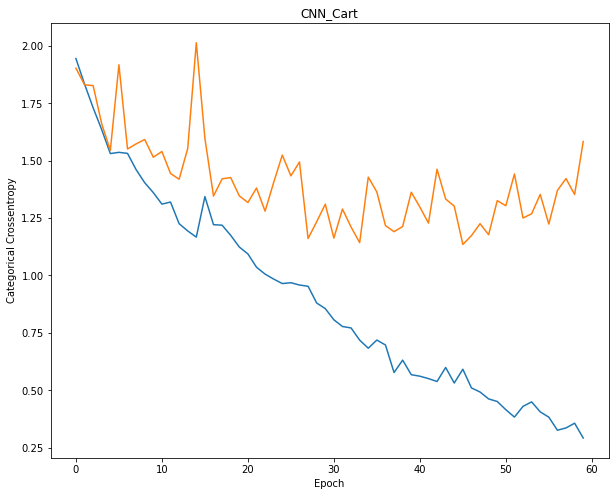

In [ ]:
#Plot Training and Validation Loss of last run
plt.figure(figsize=(10,8))
plt.title('CNN_Cart')
plt.plot(model_hist.history['loss'], label='Training')
plt.plot(model_hist.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy');